### Logistic-regression

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
np.random.seed(42)

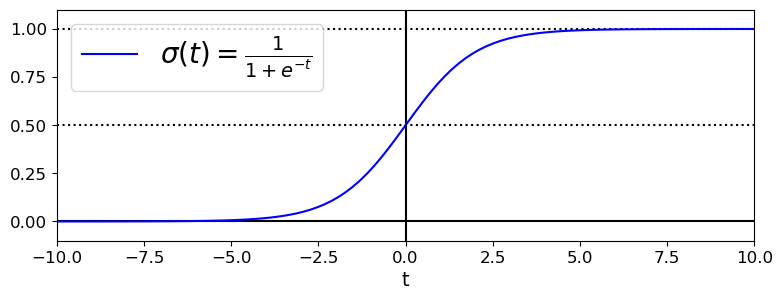

In [10]:
t = np.linspace(-10, 10, 100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10], [0,0], 'k-')
plt.plot([-10,10], [0.5,0.5], 'k:')
plt.plot([-10,10], [1,1], 'k:')
plt.plot([0,0], [-1.1,1.1], 'k-')

plt.plot(t, sig, 'b-', label=r'$\sigma(t)=\frac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize=20)
plt.axis([-10,10, -0.1, 1.1])
plt.show()

### Load dataset from sklearn

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

demonstrate using one feature on binary classification

In [16]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int64)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# training model
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [39]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_predict = log_res.predict_proba(X_new)


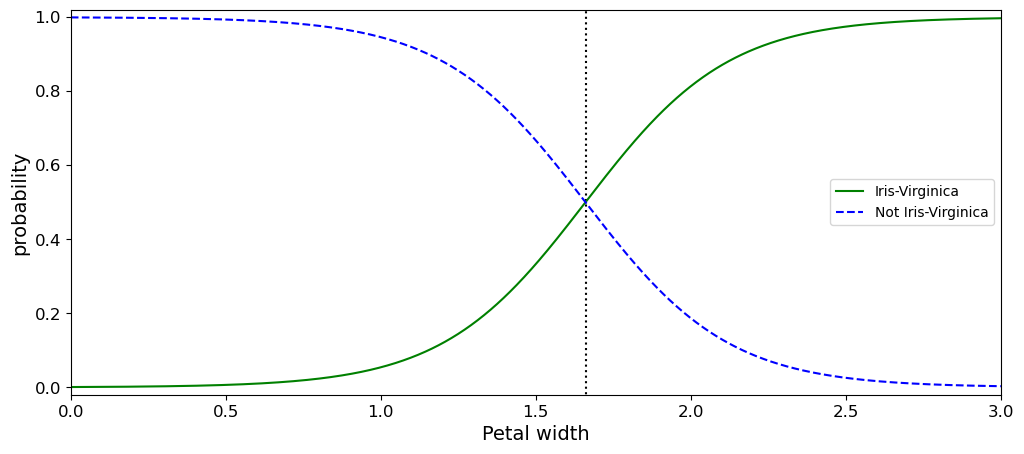

In [40]:
# plot the probability for the X_new feature
plt.figure(figsize=(12,5))
decision_boundary = X_new[y_predict[:,1]>=0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1,2], 'k:')
plt.plot(X_new, y_predict[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_predict[:,0], 'b--', label='Not Iris-Virginica')
plt.xlabel('Petal width')
plt.ylabel('probability')
plt.axis([0,3,-0.02, 1.02])
plt.legend()
plt.show()

Figure above explanation:
1. Only one feature named 'Petal width' and the binary target (0,1).
2. Logistic regression model using the feature to learn which target it belongs.
3. Given new data as input for the model from step 2 to predict which group the new data is.
4. The output is probability.